<a href="https://colab.research.google.com/github/SVNDR/An-lisis-COVID-19/blob/main/An%C3%A1lisis_exploratorio_descriptivo_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias

In [ ]:
!pip install --upgrade pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
pd. __version__

'1.3.5'

Importación del DataSet

In [ ]:
df = pd.read_csv("covid_19_data.csv")
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
118251,118252,09/24/2020,Punjab,India,2021-04-02 15:13:53,105220.0,3066.0,81475.0
238751,238752,03/02/2021,Karelia Republic,Russia,2021-04-02 15:13:53,41021.0,311.0,36987.0
11076,11077,04/01/2020,Liaoning,Mainland China,2020-04-01 22:04:58,140.0,2.0,124.0
265599,265600,04/06/2021,Meta,Colombia,2021-04-07 04:20:53,44162.0,1006.0,42740.0
284038,284039,04/30/2021,Orenburg Oblast,Russia,2021-05-01 04:20:47,42337.0,854.0,38387.0
141803,141804,10/26/2020,Astrakhan Oblast,Russia,2021-04-02 15:13:53,8964.0,155.0,7056.0
294993,294994,05/15/2021,NaN,Denmark,2021-05-16 04:20:49,265539.0,2502.0,250257.0
139319,139320,10/22/2020,Virgin Islands,US,2021-04-02 15:13:53,1343.0,21.0,0.0
9462,9463,03/27/2020,Gansu,Mainland China,2020-03-27 23:27:48,136.0,2.0,123.0
11933,11934,04/04/2020,NaN,Rwanda,4/4/20 9:38,102.0,0.0,0.0


In [ ]:
#Cambio del formato de la columna a formato tiempo

df.sample(10)
df["ObservationDate"] = pd.to_datetime(df["ObservationDate"])


In [ ]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [ ]:
df = df[[
 "ObservationDate",
 "Country/Region",
 "Confirmed",
 "Deaths",
 "Recovered"]]

df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0


In [ ]:
#Nuevo dataframe

df_time = df.groupby("ObservationDate").sum()
df_time.head(5)


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0


In [ ]:
df1 = df_time["Confirmed"].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [ ]:
df2 = df_time["Deaths"].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [ ]:
#Diferencia entre numeros de confirmados y numero de muertos.

df1 - df2


ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [ ]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [ ]:
#Analiza como han ido aumentando las cifras día tras día

df_diff = df_time.diff()
df_diff


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [ ]:
df_time.diff().mean()

Confirmed    344728.200811
Deaths         7167.549696
Recovered    217323.811359
dtype: float64

In [ ]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [ ]:
#Se completan los valores Nan

df_diff = df_diff.fillna({"Confirmed": 557.0,
 "Deaths": 17.0,
 "Recovered" : 30.0})
df_diff


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [ ]:
#Se agrupan valores de a 7 días

df_diff.resample("7D").sum()


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,108.0
2020-01-29,18314.0,361.0,749.0
2020-02-05,20911.0,621.0,3827.0
2020-02-12,30335.0,894.0,9668.0
2020-02-19,5277.0,701.0,13553.0
...,...,...,...
2021-04-28,5642661.0,92528.0,4666430.0
2021-05-05,5331241.0,89658.0,4838711.0
2021-05-12,4541037.0,86840.0,4800529.0


In [ ]:
#Suma mensual de casos confirmados

df_diff.resample("M").sum()


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,225.0
2020-02-29,76087.0,2728.0,39556.0
2020-03-31,771462.0,39242.0,138226.0
2020-04-30,2401731.0,192394.0,837095.0
2020-05-31,2910561.0,138242.0,1626127.0
2020-06-30,4319842.0,138411.0,2711439.0
2020-07-31,7127806.0,168508.0,5019965.0
2020-08-31,7909780.0,171272.0,6449484.0
2020-09-30,8504867.0,163907.0,6847448.0


In [ ]:
df_diff.resample("M").count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,31,31,31
2020-09-30,30,30,30


In [ ]:
df_cum = df_time.resample("12h").sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [ ]:
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,1097.0,34.0,60.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,941.0,26.0,39.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169470725.0,3523117.0,106633069.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [ ]:
df_cum.ffill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,557.0,17.0,30.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1097.0,34.0,60.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,168970791.0,3511297.0,106078106.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [ ]:
df_cum.fillna(-1000)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,-1000.0,-1000.0,-1000.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [ ]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,827.0,25.5,45.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1019.0,30.0,49.5
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [ ]:
#Se agrega una nueva columna al dataframe que muestra la tasa de supervivencia

df_cum["rate"] = 1 - df_cum["Deaths"]/df_cum["Confirmed"]
df_cum


,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211


In [ ]:
#Se modifica el dataset

df_cum = df_cum.reset_index()
df_cum


,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
1,2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2,2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
3,2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
4,2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...,...
982,2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
983,2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
984,2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211
985,2021-05-28 12:00:00,169711142.5,3528368.0,106886869.0,0.979210


In [ ]:
df_cum.groupby(pd.Grouper(key="ObservationDate", freq= "M"))[["rate"]].mean()

,rate
ObservationDate,
2020-01-31,0.974241
2020-02-29,0.973562
2020-03-31,0.960046
2020-04-30,0.935326
2020-05-31,0.933192
2020-06-30,0.945718
2020-07-31,0.957081
2020-08-31,0.964339
2020-09-30,0.968524


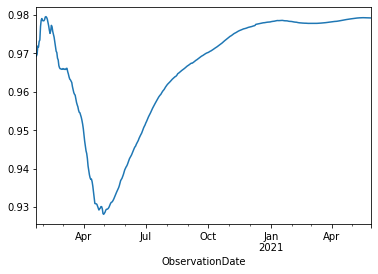

In [ ]:
#Gráfica

sr = df_cum.groupby(pd.Grouper(key="ObservationDate", freq= "1D"))["rate"].mean()
sr.plot()

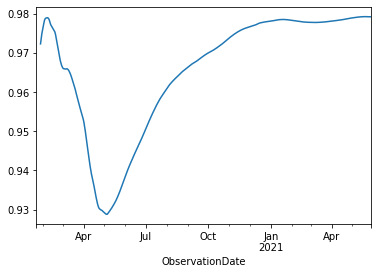

In [ ]:
#Gráfico similar al anterior pero suavizado

sr.rolling(window=7).mean().plot()


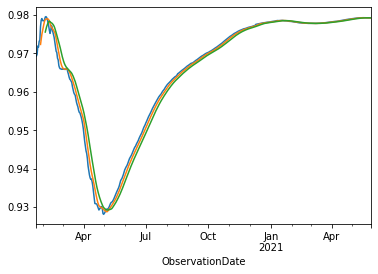

In [ ]:
#Aumenta el suavizado de las curvas

sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()


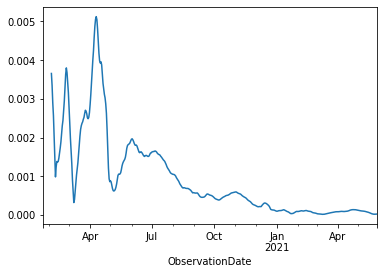

In [ ]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

In [ ]:
#Se muestra el país que mas casos de covid posee

df_max = df.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False)
df_max


Country/Region
France                   5863138.0
India                    5713215.0
Turkey                   5235978.0
UK                       3910803.0
US                       3788713.0
                           ...    
Micronesia                     1.0
North Ireland                  1.0
Republic of the Congo          1.0
 Azerbaijan                    1.0
China                          0.0
Name: Confirmed, Length: 229, dtype: float64

In [ ]:
df_max.head(30)

Country/Region
France            5863138.0
India             5713215.0
Turkey            5235978.0
UK                3910803.0
US                3788713.0
Argentina         3732263.0
Brazil            3254893.0
Iran              2893218.0
Poland            2871371.0
Indonesia         1809926.0
Czech Republic    1660935.0
South Africa      1659070.0
Philippines       1216582.0
Iraq              1193608.0
Russia            1173637.0
Romania           1077426.0
Colombia           951083.0
Peru               878346.0
Portugal           848213.0
Israel             839453.0
Italy              834527.0
Germany            804733.0
Hungary            804032.0
Bangladesh         797386.0
Jordan             734659.0
Spain              714616.0
Serbia             712046.0
Switzerland        693023.0
Mexico             657832.0
Austria            644207.0
Name: Confirmed, dtype: float64

In [ ]:
list (df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [ ]:
df_time = df.groupby(["Country/Region",
            pd.Grouper(key="ObservationDate", freq="1D")]).sum()
df_time    

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[87281 rows x 3 columns]

In [ ]:
df_china = df_time.loc["Mainland China", :]

In [ ]:
df_china

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,1082.0,34.0,58.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
...,...,...,...
2021-05-25,91019.0,4636.0,86063.0
2021-05-26,91038.0,4636.0,86075.0
2021-05-27,91045.0,4636.0,86097.0


AttributeError: ignored

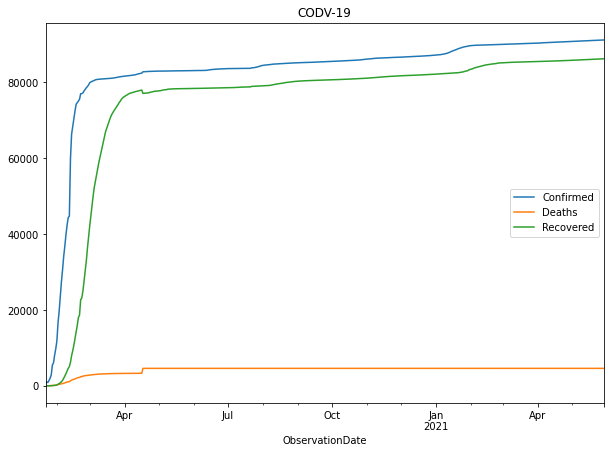

In [ ]:
#Se muestra el n° de casos confirmados, las muertes y los recuperados

df_china.plot (figsize = (10, 7), title = "CODV-19") 
plt.xlabel("Date")
plt.ylabel("People")
plt.show()


AttributeError: ignored

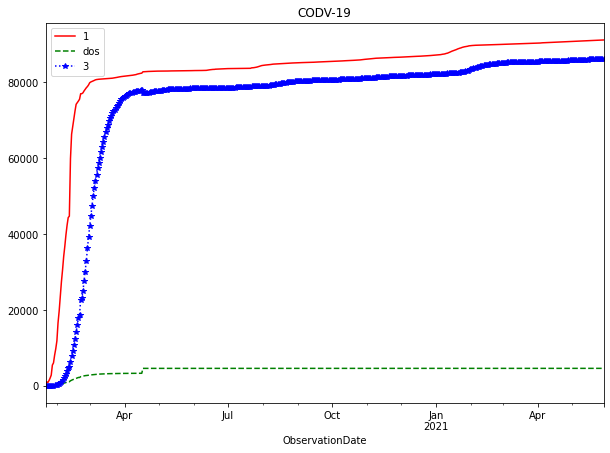

In [ ]:
ax = df_china.plot (figsize = (10, 7), title = "CODV-19",
               legend = False,
               style = ["r-", "g--", "b:*"]) 
ax.legend(["1", "dos", "3"])
plt.xlabel("Date")
plt.ylabel("People")
plt.show()

In [ ]:
df_monthly = df_china.resample("M").max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,81524.0,3305.0,76062.0
2020-04-30,82874.0,4633.0,77900.0
2020-05-31,83017.0,4634.0,78307.0
2020-06-30,83534.0,4634.0,78480.0
2020-07-31,84337.0,4634.0,78990.0
2020-08-31,85058.0,4634.0,80206.0
2020-09-30,85412.0,4634.0,80587.0


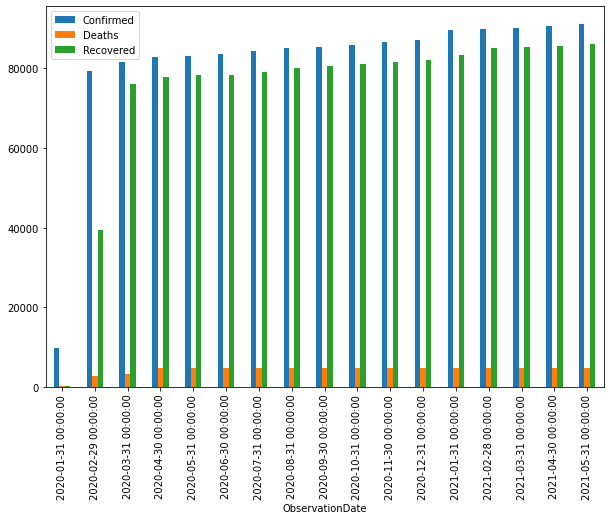

In [ ]:
df_monthly.plot(figsize = (10, 7), kind="bar")

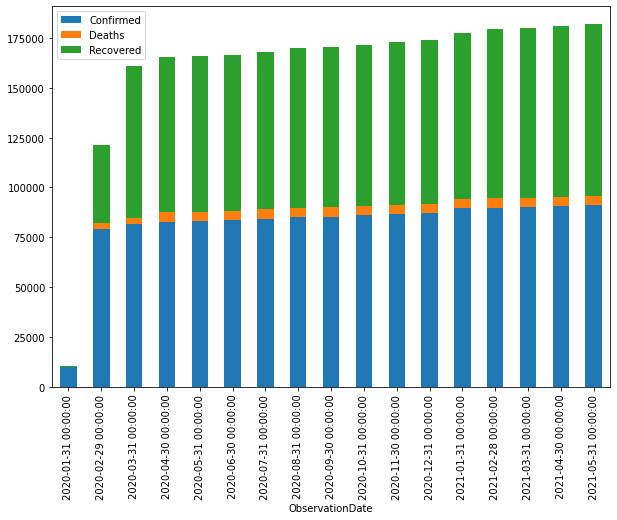

In [ ]:
df_monthly.plot(figsize = (10, 7), kind="bar", stacked = True)

In [ ]:
df_monthly["Traitment"] = df_monthly["Confirmed"] - df_monthly["Deaths"] - df_monthly["Recovered"]
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,81524.0,3305.0,76062.0,2157.0
2020-04-30,82874.0,4633.0,77900.0,341.0
2020-05-31,83017.0,4634.0,78307.0,76.0
2020-06-30,83534.0,4634.0,78480.0,420.0
2020-07-31,84337.0,4634.0,78990.0,713.0
2020-08-31,85058.0,4634.0,80206.0,218.0
2020-09-30,85412.0,4634.0,80587.0,191.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6da0a12490>,
      dtype=object)

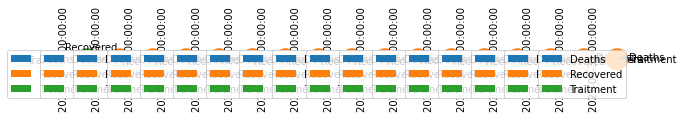

In [ ]:
df_monthly[["Deaths", "Recovered", "Traitment"]].T.plot(figsize = (10, 7), kind = "pie", subplots = True)

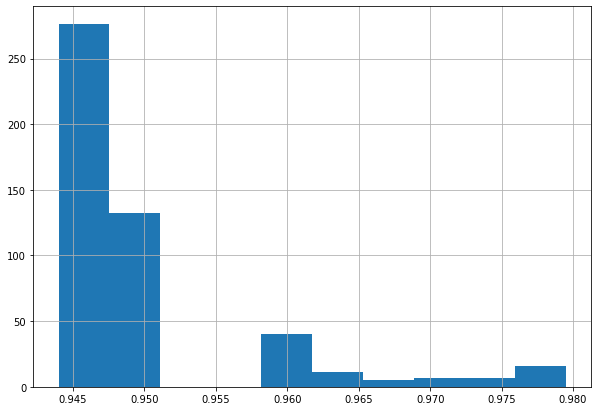

In [ ]:
df_china["rate"] = 1 -  df_china["Deaths"]/df_china["Confirmed"]
df_china["rate"].hist(figsize = (10,7), bins = 10)

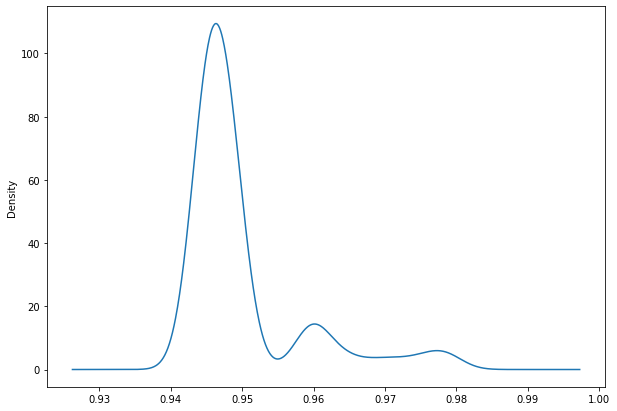

In [ ]:
#Distribucion paramétrica en torno a la tasa de supervivencia

df_china["rate"].plot(kind = "kde", figsize = (10, 7))
